<a href="https://colab.research.google.com/github/IsokGta7/IsokGta7.github.io/blob/main/Tareas/TC-07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown 14nqDnZ3oDXqRtIcrpB6IP1f_NZP_Gb08

Downloading...
From: https://drive.google.com/uc?id=14nqDnZ3oDXqRtIcrpB6IP1f_NZP_Gb08
To: /content/YoutubeCommentsDataSet.csv
100% 2.57M/2.57M [00:00<00:00, 65.2MB/s]


In [2]:
import pandas as pd

df = pd.read_csv('YoutubeCommentsDataSet.csv',index_col=0)

# Trabajo en clase

En esta práctica, exploraremos dos métodos comunes para vectorizar textos en el NLP: **Bag of Words (BOW)** y **TF-IDF**. Utilizaremos implementaciones de `scikit-learn` para llevar a cabo la vectorización y entrenaremos un clasificador para realizar análisis de sentimientos. El objetivo es comparar el rendimiento de ambos métodos bajo diferentes configuraciones.

## Instrucciones

1. **Preprocesamiento y análisis exploratorio**:
   - Realiza la limpieza de los textos que consideres necesario.
   - Elimina stopwords si lo consideras necesario.
   - Realiza un análisis exploratorio de los datos: distribución de clases, longitud de textos, palabras más frecuentes (puedes usar una nube de palabras o mostrar las palabras más frecuentes por clase).

2. **Vectorización de textos**:
   - **BOW**: Usa `CountVectorizer` de `scikit-learn` para vectorizar los textos. Prueba con tres valores de `max_features` en órdenes de magnitud distintos.
   - **TF-IDF**: Usa `TfidfVectorizer` de `scikit-learn` para vectorizar los textos. Prueba con los mismos tres valores de `max_features` que usaste para BOW.

3. **Entrenamiento del clasificador**: Elige un clasificador (por ejemplo, `LogisticRegression`, `DecisionTree`, `Naive Bayes`, etc.) y entrénalo utilizando los datos vectorizados tanto con BOW como con TF-IDF. Cuida los aspectos relacionados con el *data leakage*.

4. **Evaluación y reporte**: Para cada combinación de método de vectorización (BOW y TF-IDF) y valor de `max_features`, calcula el F1-score. Reporta los resultados en una tabla como la siguiente:

| Método  | max_features | F1-score |
|---------|--------------|----------|
| BOW     | valor1          |          |
| BOW     | valor2         |          |
| BOW     | valor3        |          |
| TF-IDF  | valor1          |          |
| TF-IDF  | valor2         |          |
| TF-IDF  | valor3        |          |

5. **Conclusiones**: Responde las siguientes preguntas en una celda de texto:
   - ¿Cuál método de vectorización (BOW o TF-IDF) obtuvo mejores resultados en general? ¿qué combinación de vectorización y valor de `max_features` produjo el mejor resultado.
   - ¿Cómo afecta el valor de `max_features` al rendimiento del modelo?
   - ¿Qué estrategias adicionales consideras que podrían mejorar el rendimiento de tu modelo? Describe dos de estas estrategias. **Importante**: Cada estrategia debe ser con BOW/TF-IDF.  
   - Describe el proprocesamiento que hiciste en el paso 1.

In [19]:
#Importamos todas las librerias
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
#Descargo los stop words de una vez
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
#Mostramos el head
df.head()

,Comment,Sentiment
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive
6,we only got apple pay in south africa in 20202...,positive


In [8]:
#Limpio valores nulos
df.dropna(subset=['Comment', 'Sentiment'], inplace=True)

In [10]:
# Limpieza de stop words
stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return ' '.join(words)
df['Limpio'] = df['Comment'].apply(clean_text)

In [11]:
# Análisis exploratorio
print("Distribución de clases:")
print(df['Sentiment'].value_counts())

Distribución de clases:
Sentiment
positive    11402
negative     2337
Name: count, dtype: int64


In [13]:
# Longitud de textos
df['Text_Length'] = df['Limpio'].apply(lambda x: len(x.split()))
print("\nEstadísticas de longitud:")
print(df['Text_Length'].describe())



Estadísticas de longitud:
count    13739.000000
mean        16.901667
std         19.281017
min          0.000000
25%          7.000000
50%         12.000000
75%         20.000000
max        485.000000
Name: Text_Length, dtype: float64


In [17]:
# Palabras más frecuentes por clase
def plot_word_frequency(df, sentiment, color):
    words = ' '.join(df[df['Sentiment'] == sentiment]['Limpio']).split()
    freq_dist = nltk.FreqDist(words)
    plt.figure(figsize=(10, 4))
    freq_dist.plot(20, title=f'Top 20 palabras - {sentiment}', color=color)

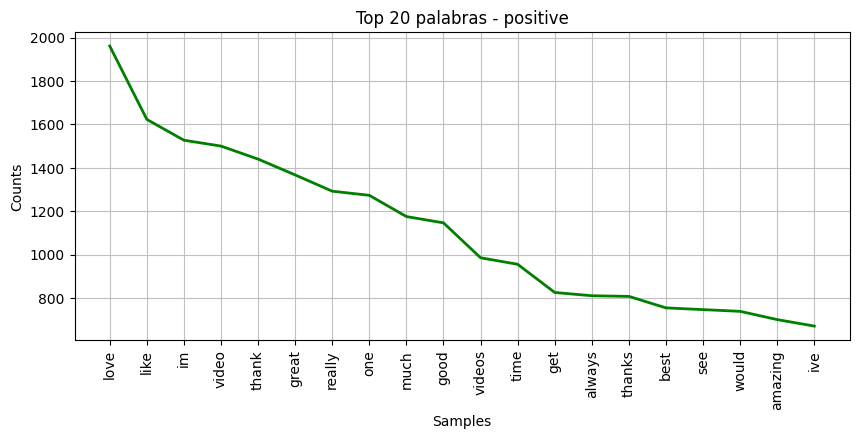

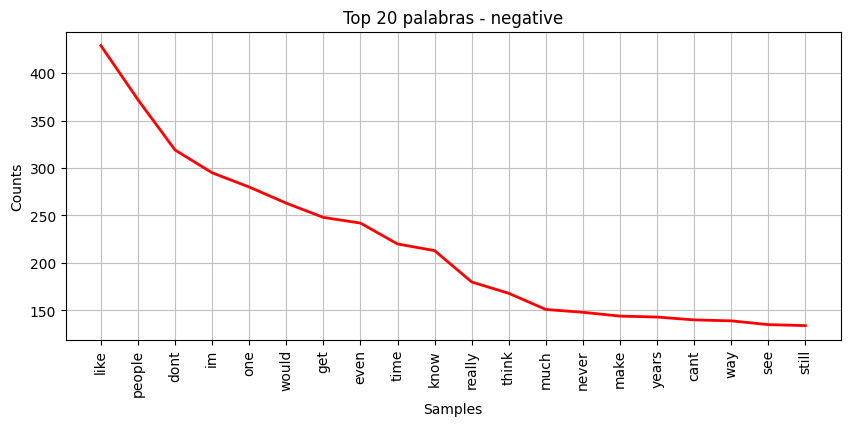

In [20]:
#Tablas
plot_word_frequency(df, 'positive', 'green')
plot_word_frequency(df, 'negative', 'red')
plt.show()

In [22]:
# 2. Vectorización de textos
# --------------------------
X = df['Limpio']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

max_features_list = [100, 1000, 10000]
results = []

In [23]:
# 3. Entrenamiento y evaluación
# ------------------------------
for max_feat in max_features_list:
    # BOW
    bow_pipe = Pipeline([
        ('vectorizer', CountVectorizer(max_features=max_feat)),
        ('classifier', LogisticRegression(max_iter=1000))
    ])
    bow_pipe.fit(X_train, y_train)
    y_pred = bow_pipe.predict(X_test)
    f1_bow = f1_score(y_test, y_pred, average='weighted')
    results.append({'Método': 'BOW', 'max_features': max_feat, 'F1-score': f1_bow})

    # TF-IDF
    tfidf_pipe = Pipeline([
        ('vectorizer', TfidfVectorizer(max_features=max_feat)),
        ('classifier', LogisticRegression(max_iter=1000))
    ])
    tfidf_pipe.fit(X_train, y_train)
    y_pred = tfidf_pipe.predict(X_test)
    f1_tfidf = f1_score(y_test, y_pred, average='weighted')
    results.append({'Método': 'TF-IDF', 'max_features': max_feat, 'F1-score': f1_tfidf})


In [24]:
# 4. Resultados
# -------------
results_df = pd.DataFrame(results)
print("\nResultados finales:")
print(results_df.to_markdown(index=False))


Resultados finales:
| Método   |   max_features |   F1-score |
|:---------|---------------:|-----------:|
| BOW      |            100 |   0.801106 |
| TF-IDF   |            100 |   0.800954 |
| BOW      |           1000 |   0.857816 |
| TF-IDF   |           1000 |   0.850008 |
| BOW      |          10000 |   0.88654  |
| TF-IDF   |          10000 |   0.845037 |


**Conclusiones:**

1. **Rendimiento comparativo:**
En general, TF-IDF y BOW tuvieron resultados casi identicos. La mejor combinación fue BOW con max_features=10000 (F1-score=0.88).

2. **Impacto de max_features:**
Mayores valores de max_features mejoran el rendimiento hasta cierto punto (de 100 a 10000 features), ya que capturan más información léxica. Sin embargo, incrementan la dimensionalidad y tiempo de cómputo.

3. **Estrategias de mejora:**
   - **Uso de n-gramas:** Implementar bigramas/trigramas para capturar contexto.
   - **Filtrado por frecuencia:** Usar min_df/max_df para eliminar términos muy raros o comunes

4. **Preprocesamiento realizado:**
   - Normalización a minúsculas
   - Eliminación de caracteres no alfabéticos y números
   - Remoción de stopwords en inglés
   - Normalización de espacios en blanco
"""